# Análisis Exploratorio de Datos (EDA) del Consumo Energético Global

Este notebook realiza un análisis exploratorio detallado del dataset de consumo energético global (2000-2024). Incluye visualizaciones de distribuciones (histogramas, KDE), análisis de correlaciones, tendencias temporales por país y comparativas entre sectores. Su objetivo es identificar patrones clave, outliers y relaciones entre variables como consumo total, uso per cápita, adopción de renovables y emisiones de CO₂.


# Índice

1. [Configuraciones del Entorno de Trabajo y Rutas](#1-configuraciones-del-entorno-de-trabajo-y-rutas)
    
2. [Carga y Descripción General del Dataset](#2-carga-y-descripción-general-del-dataset)

    * [Visión General del Dataset](#21-visión-general-del-dataset)
    * [Análisis de la Estructura Temporal y Geografica del Dataset](#22-análisis-de-la-estructura-temporal-y-geografica-del-dataset)

3. [Visualizaciones Univariantes (distribuciones) y Bivariantes (correlaciones).](#3-visualizaciones-univariantes-distribuciones-y-bivariantes-correlaciones)

    * [Histogramas y Gráficas de KDE de Todas las Variables](#31-histogramas-y-gráficas-de-kde-de-todas-las-variables)
    * [Gráficos de Correlacción](#32-gráficos-de-correlacción)

4. [Análisis de Series Temporales por País.](#4-análisis-de-series-temporales-por-país)

5. [Identifiación de Patrones y Outliers](#5-identifiación-de-patrones-y-outliers)

6. [Análisis y Conclusiones](#6-análisis-y-conclusiones)

## 1. Configuraciones del Entorno de Trabajo y Rutas

* Imporación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Importacióin de Librerías Personalizadas

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import src.visualizacion as vis
import src.preprocesamiento as pre

* Configuración Global

In [3]:
# Configración de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_rows', 50)

# Configuación de NumPy
np.set_printoptions(precision=2, suppress=True)

# Configuración de Matplotlib
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Configuración de Seaborn
sns.set_style('whitegrid')
sns.set_palette('deep')
sns.set_context('notebook', font_scale=1.2)

* Rutas

In [4]:
data_path = os.path.join('..', 'data', 'original', 'global_energy_consumption.csv')

## 2. Carga y Descripción General del Dataset

* Carga de Datos Crudos (`global_energy_consumption.csv`)

In [5]:
# Convirtiendo el dataset en un dataframe de pandas
df = pre.cargar_datos(data_path)

for col in df.columns[0:10]:
    minimo = df[col].min()
    maximo = df[col].max()
    print(f"Máximo/mínimo de {col}: {maximo} / {minimo}")

Máximo/mínimo de Country: USA / Australia
Máximo/mínimo de Year: 2024 / 2000
Máximo/mínimo de Total Energy Consumption (TWh): 9999.26 / 100.48
Máximo/mínimo de Per Capita Energy Use (kWh): 49989.57 / 500.27
Máximo/mínimo de Renewable Energy Share (%): 90.0 / 5.0
Máximo/mínimo de Fossil Fuel Dependency (%): 80.0 / 10.01
Máximo/mínimo de Industrial Energy Use (%): 60.0 / 20.0
Máximo/mínimo de Household Energy Use (%): 40.0 / 10.0
Máximo/mínimo de Carbon Emissions (Million Tons): 4999.34 / 50.64
Máximo/mínimo de Energy Price Index (USD/kWh): 0.5 / 0.05


### 2.1. Visión General del Dataset

* Dimensiones del Dataset

In [6]:
print("Las dimensiones del dataset son: ", df.shape)

Las dimensiones del dataset son:  (10000, 10)


* Visualización de las Primeras y Ultimas filas del Dataset

In [7]:
df.head(5)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,"9,525.38","42,301.43",13.70,70.47,45.18,19.96,"3,766.11",0.12
1,Germany,2020,"7,922.08","36,601.38",33.63,41.95,34.32,22.27,"2,713.12",0.08
2,Russia,2002,"6,630.01","41,670.20",10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,"8,580.19","10,969.58",73.24,16.71,30.55,27.60,"1,144.11",0.47
4,Canada,2006,848.88,"32,190.85",73.60,74.86,42.39,23.43,842.39,0.48


In [8]:
df.tail(5)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
9995,Canada,2017,"9,786.50","30,481.07",14.87,70.25,53.93,19.94,620.85,0.29
9996,UK,2011,"7,200.88","37,402.75",89.00,16.55,24.35,20.57,830.73,0.48
9997,India,2011,"2,579.82","44,516.91",46.65,68.06,57.01,33.73,993.78,0.08
9998,UK,2020,"5,950.39","22,289.39",43.43,68.57,34.94,25.40,199.85,0.47
9999,Brazil,2018,"5,387.71","17,454.75",89.62,49.97,30.04,37.96,"4,606.33",0.11


* Información Basica del Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


* Resumen Estadistico

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,"10,000.00","2,012.15",7.16,"2,000.00","2,006.00","2,012.00","2,018.00","2,024.00"
Total Energy Consumption (TWh),"10,000.00","5,142.56","2,848.75",100.48,"2,713.88","5,190.85","7,579.98","9,999.26"
Per Capita Energy Use (kWh),"10,000.00","25,039.95","14,205.66",500.27,"12,683.22","25,098.77","37,113.28","49,989.57"
Renewable Energy Share (%),"10,000.00",47.32,24.60,5.00,26.11,47.15,68.68,90.00
Fossil Fuel Dependency (%),"10,000.00",44.93,20.20,10.01,27.34,45.11,62.43,80.00
Industrial Energy Use (%),"10,000.00",40.06,11.54,20.00,30.22,39.98,50.15,60.00
Household Energy Use (%),"10,000.00",25.04,8.60,10.00,17.61,25.09,32.57,40.00
Carbon Emissions (Million Tons),"10,000.00","2,536.15","1,424.11",50.64,"1,293.33","2,568.01","3,766.18","4,999.34"
Energy Price Index (USD/kWh),"10,000.00",0.27,0.13,0.05,0.16,0.27,0.39,0.50


* Cantidad y Proporción de Datos por País

In [11]:
df_temp = df[['Country', 'Year']].value_counts()
df_temp = pd.DataFrame(df_temp).reset_index()
df_temp.columns = ['Country', 'Year', 'Count']
df_temp.head(25)

,Country,Year,Count
0,Canada,2015,57
1,Australia,2014,56
2,Brazil,2020,54
3,Australia,2015,54
4,USA,2012,54
5,India,2012,54
6,India,2018,52
7,Russia,2009,52
8,Canada,2020,52
9,China,2016,52


In [12]:
df_temp.tail(25)

,Country,Year,Count
225,Japan,2022,32
226,Germany,2010,32
227,India,2024,32
228,Brazil,2010,32
229,Brazil,2000,32
230,UK,2008,31
231,Canada,2003,31
232,Australia,2003,30
233,Germany,2012,30
234,Brazil,2009,30


In [13]:
df['Country'].value_counts(normalize = True)

Country
USA         0.11
UK          0.10
Australia   0.10
Canada      0.10
India       0.10
Japan       0.10
China       0.10
Germany     0.10
Russia      0.10
Brazil      0.10
Name: proportion, dtype: float64

* Cantidad y Proporción de Datos por Año

In [14]:
df['Year'].value_counts()

Year
2014    450
2020    430
2018    428
2015    428
2012    419
2007    414
2017    413
2016    412
2009    408
2019    407
2021    403
2023    403
2011    400
2003    400
2013    399
2022    397
2006    394
2001    393
2005    392
2008    384
2000    380
2024    376
2004    374
2002    372
2010    324
Name: count, dtype: int64

In [15]:
df['Year'].value_counts(normalize = True)

Year
2014   0.04
2020   0.04
2018   0.04
2015   0.04
2012   0.04
2007   0.04
2017   0.04
2016   0.04
2009   0.04
2019   0.04
2021   0.04
2023   0.04
2011   0.04
2003   0.04
2013   0.04
2022   0.04
2006   0.04
2001   0.04
2005   0.04
2008   0.04
2000   0.04
2024   0.04
2004   0.04
2002   0.04
2010   0.03
Name: proportion, dtype: float64

* Verifiación de Valores Nulos

In [16]:
df.isna().sum()

Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64

### 2.2. Análisis de la Estructura Temporal y Geografica del Dataset

*  Distribución de Paises en el Dataset

In [17]:
print(f"Número total de paises presentes en el dataset: {df['Country'].nunique()}")

Número total de paises presentes en el dataset: 10


In [18]:
print(f"Piases únicos en el dataset: {df['Country'].unique()}")

Piases únicos en el dataset: ['Canada' 'Germany' 'Russia' 'Brazil' 'UK' 'India' 'Australia' 'China'
 'USA' 'Japan']


In [19]:
print(f"Número total de años presentes en el dataset: {df['Year'].nunique()}")

Número total de años presentes en el dataset: 25


In [20]:
print(f"Período de tiempo del dataset: {df['Year'].min()} - {df['Year'].max()}")

Período de tiempo del dataset: 2000 - 2024


## 3. Visualizaciones Univariantes (distribuciones) y Bivariantes (correlaciones).

### 3.1. Histogramas y Gráficas de KDE de Todas las Variables

In [21]:
columnas = ['Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 
        'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 
        'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)',
        'Industrial Energy Use (%)', 'Household Energy Use (%)']

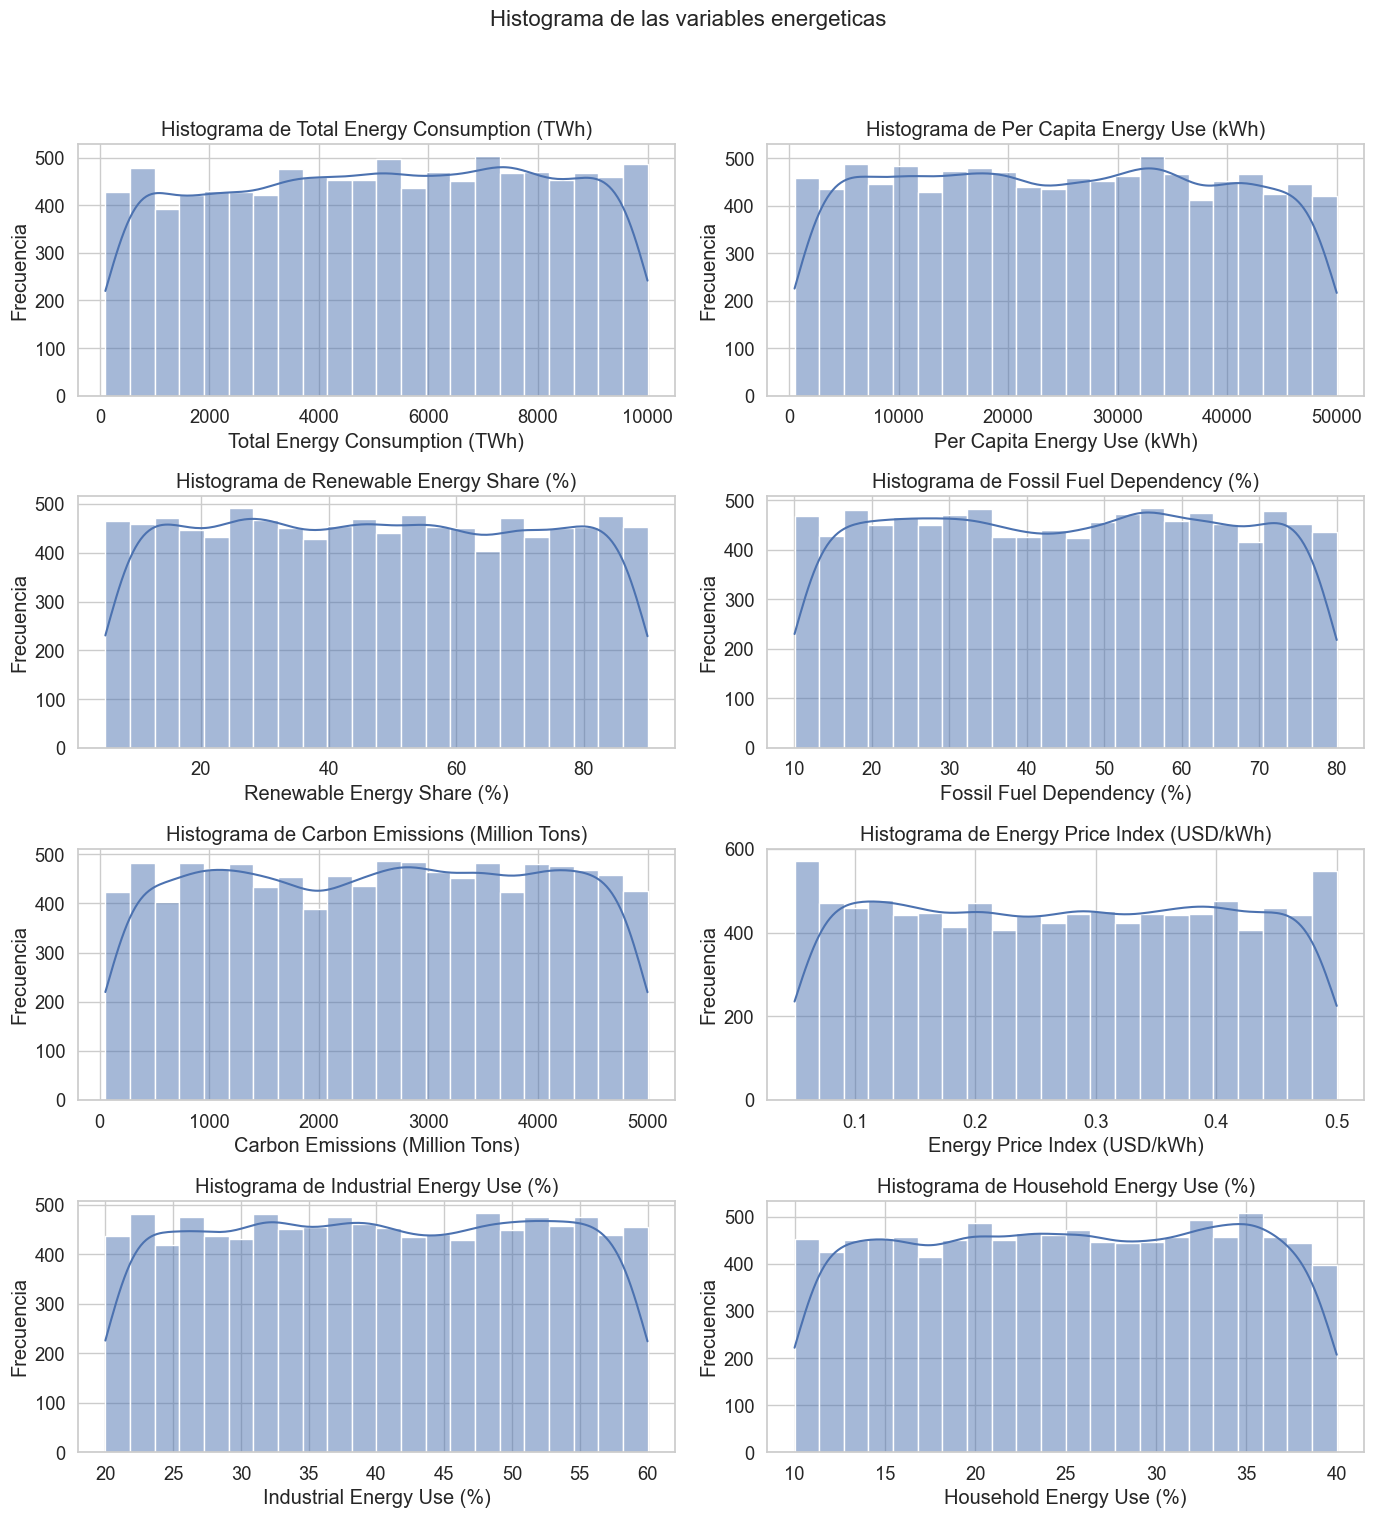

In [22]:
vis.crear_histograma_multiples(df, columnas, "Histograma de las variables energeticas")

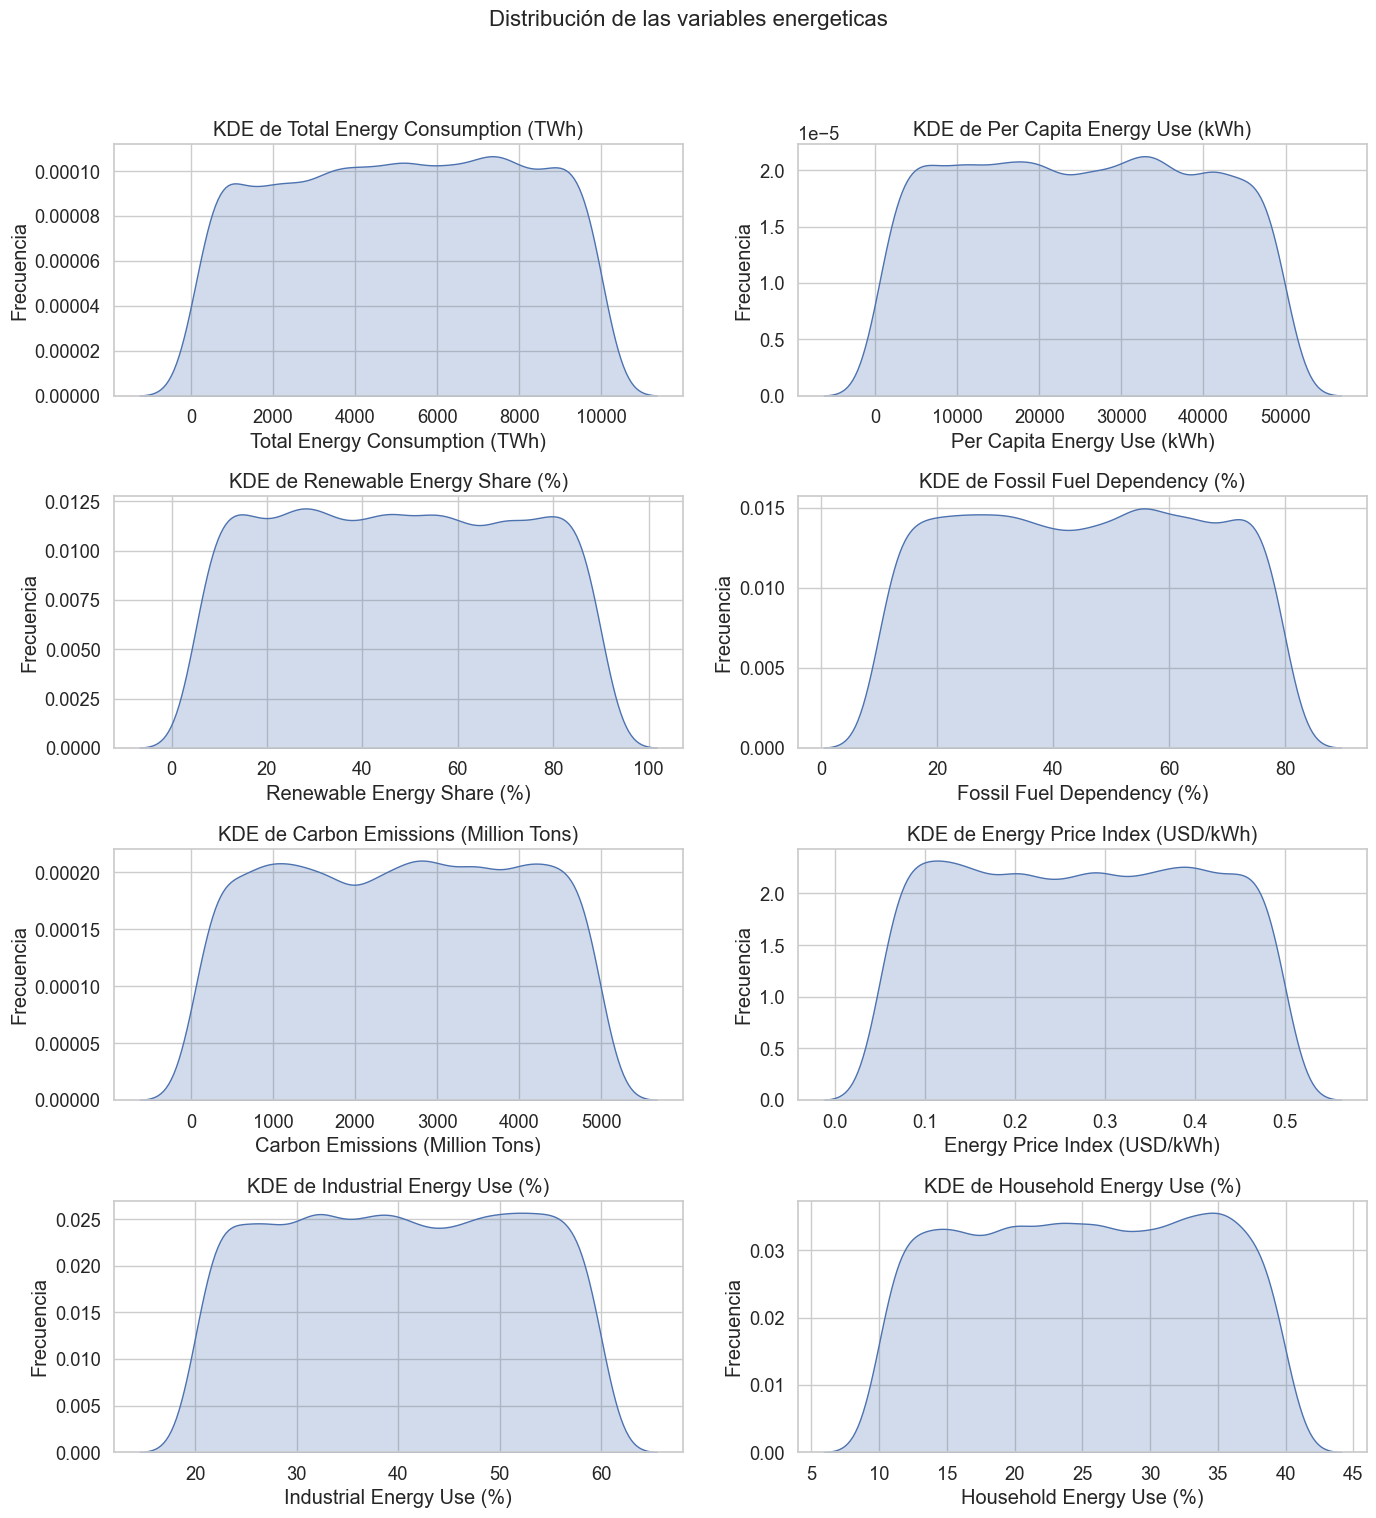

In [23]:
vis.crear_kde_multiples(df, columnas, "Distribución de las variables energeticas")

### 3.2. Gráficos de Correlacción

* Mapa de Correlación entre Indicadores Clave del Consumo y Composición Energética

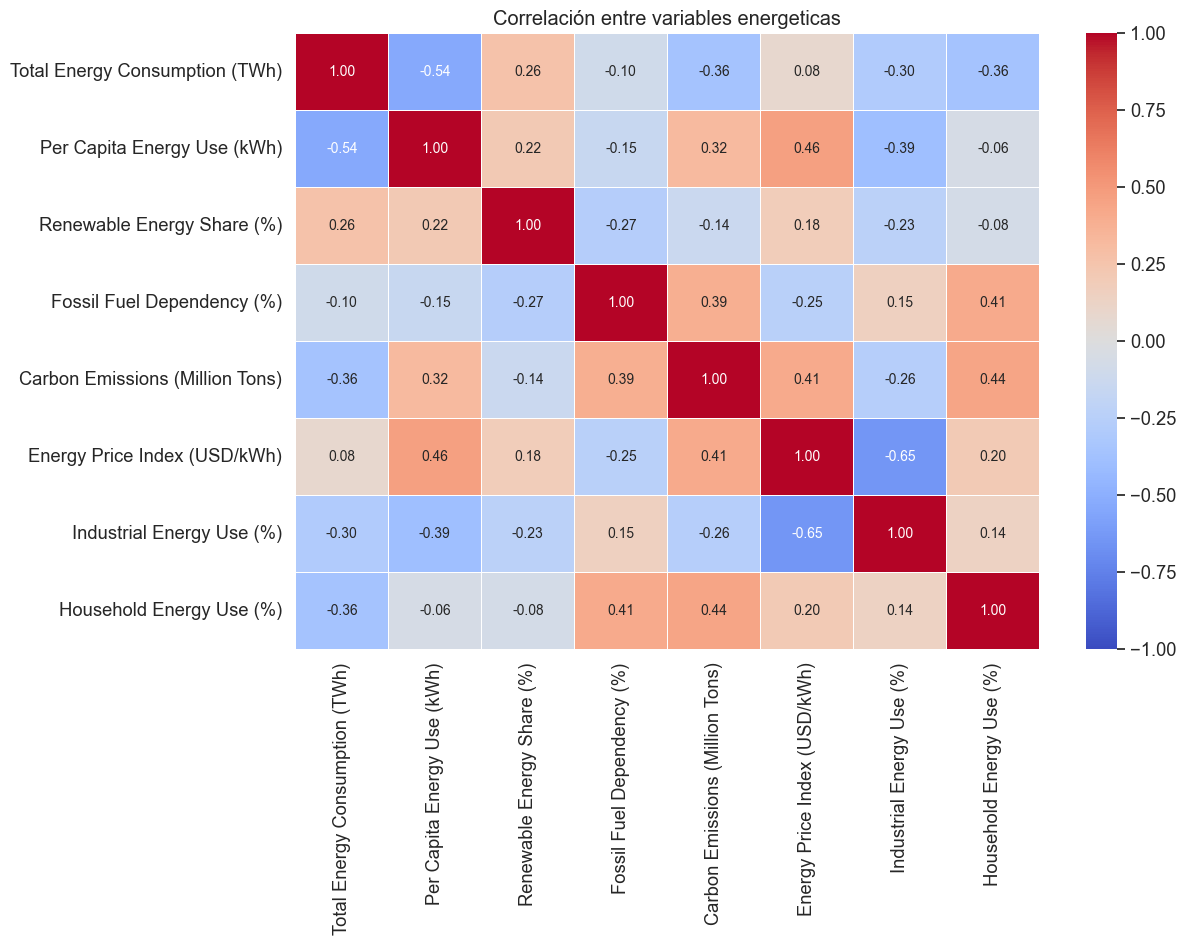

In [24]:
vis.crear_grafico_correlacion(df, columnas, 'Country', "Correlación entre variables energeticas")

## 4. Análisis de Series Temporales por País.

* Gráficas Temporales Interactivas de las Diferentes Variables Energeticas del Dataset

In [25]:
vis.crear_grafico_lineas_interactivo(df, 'Country', 'Year', columnas, 'Año', 'Consumo')

## 5. Identifiación de Patrones y Outliers

* Gráficos de Cajas y Bigotes Interactivos (boxplot)

In [26]:
vis.crear_box_plot_interactivo(df, 'Country', columnas, 'Año', 'datos_crudos')

## 6. Análisis y Conclusiones

#### **Análisis y Conclusiones: Descubrimientos Clave para la Modelización Predictiva**

De esta exploración de datos se pueden resaltar múltiples elementos y características que serán muy útiles para la implementación de diferentes modelos de machine learning, mostrando el camino para determinar la evolución del consumo energético y la adopción de nuevas fuentes.

**Implicaciones de las Variables Categóricas y Escalamiento:** La columna `'Country'`, con sus diez valores únicos, representa un vector clave para la segmentación y la comprensión del consumo global. Como es estándar en el **Machine Learning**, la conversión a un formato numérico es vital. Como es estándar en el **Machine Learning**, la conversión a un formato numérico es imperativa. Dada la naturaleza nominal de los países (no existe un orden intrínseco de jerarquía en su identidad que influya en el consumo energético), la codificación One-Hot Encoding se presenta como la mejor opción para su tratamiento. Además la disparidad en escalas de los datos o métricas subraya la necesidad crítica de escalamiento de características. Métodos como la **estandarización** (Z-score normalization) o la **normalización** Min-Max serán evaluados. Esta preparación es especialmente vital para algoritmos basados en distancia (como SVMs o K-Means) o aquellos que convergen más eficientemente con datos escalados (como la regresión logística o redes neuronales), asegurando una optimización del rendimiento y una convergencia más rápida del modelo. Esta fase preliminar no solo prepara los datos para la modelización, sino que también establece las bases para proyecciones futuras de tendencias energéticas y la identificación de caminos críticos para la transición energética.

**Calidad de Datos y Balance de Clases:** Un hallazgo particularmente favorable es la ausencia total de valores nulos en el conjunto de datos. Esto elimina la necesidad de complejas estrategias de imputación que a menudo introducen ruido o sesgos. En el ámbito del balance de datos, si bien no hay una distribución perfectamente equitativa por país o año, la diferencia del 1% en la proporción de categorías es marginal. Esto sugiere que las categorías están suficientemente balanceadas, lo que nos permite centrarnos en el análisis de tendencias y la modelización predictiva sin preocuparnos por la necesidad de técnicas de **resampling** como el **oversampling** o el **undersampling**. Una base de datos robusta y bien balanceada es esencial para desentrañar las correlaciones entre el uso de energía sectorial, los precios y las emisiones, así como para segmentar países con patrones de dependencia de combustibles fósiles similares.

**Ausencia de Outliers:** La visualización a través de diagramas de caja y bigotes ha confirmado la ausencia de valores atípicos (outliers) significativos. Este es un punto crítico. La limpieza de outliers puede ser un proceso laborioso y propenso a errores, con el riesgo de eliminar información valiosa. Su ausencia en este dataset significa una mayor integridad de los datos observados, lo que simplifica el preprocesamiento y reduce el riesgo de que valores extremos distorsionen el aprendizaje del modelo o influyan negativamente en la robustez de las predicciones. Este hallazgo optimiza el pipeline de datos, permitiéndonos destinar más recursos y tiempo a la construcción y optimización del modelo, en lugar de a la remediación de anomalías.